In [ ]:
import datetime

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(41 * 41)

In [ ]:
%%time
df = pd.read_csv('../data/parsedv3.csv')

In [ ]:
MAX_FEATURES = 6000
tf_vectorizer = CountVectorizer(min_df=5, max_df=0.5,
                                max_features=MAX_FEATURES,
                                lowercase=True,
                                token_pattern='[a-z]{3}[a-z]*',
                                stop_words='english')

In [ ]:
%%time
dtm = tf_vectorizer.fit_transform(df['text'])
dtm.shape

In [ ]:
len(tf_vectorizer.vocabulary_)

In [ ]:
NUM_TOPICS = 30
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS,
                                      max_iter=10,
                                      learning_method='online',
                                      verbose = 1,
                                      batch_size=1024,
                                      n_jobs = 7)

In [ ]:
%%time
lda_Z = lda_model.fit_transform(dtm)

In [ ]:
%%time
doc_topic_dist = lda_model.transform(dtm)

In [ ]:
def show_topics(vectorizer=tf_vectorizer, lda_model=lda_model, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=tf_vectorizer, lda_model=lda_model, n_words=1) 
words=[]
for i in topic_keywords:
    words.append(topic_keywords[i][0])

In [ ]:
doc_topic_dist[1]

In [26]:
pyLDAvis.sklearn.prepare(lda_model, dtm, tf_vectorizer)

/usr/local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
6      6.768053        1       1  0.111494 -0.087544
28     6.611273        1       2  0.150120 -0.043279
7      5.691652        1       3 -0.126885 -0.071733
14     5.502131        1       4 -0.051471 -0.111139
23     4.682185        1       5 -0.180979 -0.080307
17     4.633743        1       6  0.181300 -0.015337
12     4.411909        1       7 -0.187138  0.044774
29     4.398484        1       8 -0.109468 -0.039534
15     4.094039        1       9 -0.106586  0.078184
27     4.078768        1      10  0.169128  0.056048
24     3.752764        1      11  0.042652  0.132488
3      3.544277        1      12  0.120330 -0.025783
5      3.353401        1      13 -0.081586  0.020933
13     3.148027        1      14  0.029413  0.138019
26     2.999477        1      15 -0.142986  0.087980
10     2.905883        1      16 -0.033932  0.071812
16     2.835723        1      17  0.159662 -0.025995
25     2.749171        1      18  0.126991 -0.076405
0      2.706837        1      19  0.178477 -0.042740
9      2.593886        1      20 -0.049131  0.028641
19     2.464419        1      21  0.003170  0.145456
4      2.462711        1      22 -0.002419  0.100980
2      2.319272        1      23 -0.142464  0.062722
1      2.189672        1      24 -0.073859  0.032769
21     2.091871        1      25  0.013602 -0.014940
8      1.802692        1      26 -0.089072 -0.114912
11     1.630380        1      27  0.094052  0.009861
20     1.402841        1      28  0.132198  0.027836
22     1.385565        1      29  0.031162 -0.130973
18     0.788895        1      30 -0.165775 -0.157884, topic_info=     Category           Freq          Term          Total  loglift  logprob
term                                                                       
1053  Default  130558.000000       company  130558.000000  30.0000  30.0000
5441  Default   71620.000000           tax   71620.000000  29.0000  29.0000
1027  Default   65359.000000    commission   65359.000000  28.0000  28.0000
3175  Default   63715.000000          land   63715.000000  27.0000  27.0000
3943  Default   35881.000000        patent   35881.000000  26.0000  26.0000
4433  Default   49351.000000      railroad   49351.000000  25.0000  25.0000
3178  Default   46726.000000         lands   46726.000000  24.0000  24.0000
649   Default   59032.000000         board   59032.000000  23.0000  23.0000
2276  Default  116757.000000       federal  116757.000000  22.0000  22.0000
563   Default   45924.000000          bank   45924.000000  21.0000  21.0000
2526  Default   98079.000000    government   98079.000000  20.0000  20.0000
5690  Default   37320.000000         union   37320.000000  19.0000  19.0000
3163  Default   30533.000000         labor   30533.000000  18.0000  18.0000
3127  Default   61018.000000          jury   61018.000000  17.0000  17.0000
1287  Default   67994.000000      contract   67994.000000  16.0000  16.0000
2066  Default   29150.000000        estate   29150.000000  15.0000  15.0000
5240  Default   32281.000000         stock   32281.000000  14.0000  14.0000
1025  Default   45599.000000      commerce   45599.000000  13.0000  13.0000
4888  Default   42897.000000          sale   42897.000000  12.0000  12.0000
1345  Default   44661.000000   corporation   44661.000000  11.0000  11.0000
927   Default   59752.000000          city   59752.000000  10.0000  10.0000
5542  Default   58004.000000         title   58004.000000   9.0000   9.0000
1949  Default   26466.000000     employees   26466.000000   8.0000   8.0000
5613  Default   68872.000000         trial   68872.000000   7.0000   7.0000
1229  Default   58626.000000  constitution   58626.000000   6.0000   6.0000
319   Default   26414.000000     appellant   26414.000000   5.0000   5.0000
3011  Default   30766.000000    interstate   30766.000000   4.0000   4.0000
2818  Default   22221.000000        income   22221.000000

In [ ]:
doc_topic_sums = doc_topic_dist.sum(axis=1)
doc_topic_dist = doc_topic_dist / doc_topic_sums[:, np.newaxis]

In [13]:
year_dist = {}
year_cnt = {}
for i in range (len(df)):
    a = df["date"][i]
    yeark = datetime.datetime.strptime(a, "%Y-%m-%d").year
    if yeark in year_dist:
        year_dist[yeark] += doc_topic_dist[i]
        year_cnt[yeark] += 1
    else:
        year_dist[yeark] = doc_topic_dist[i]
        year_cnt[yeark] = 1
        
for key in year_dist:
    year_dist[key] /= year_cnt[key]

In [14]:
plt_years = list(filter(lambda year: 1780 <= year and year <= 2005, sorted(year_dist.keys())))

In [15]:
dist = np.zeros((len(plt_years), NUM_TOPICS))
for i, year in enumerate(plt_years):
    dist[i] = year_dist[year]

In [ ]:
%%time
plt.figure(figsize=(20,10))
bot = np.ones(len(plt_years)) - dist[:, 0]
plt.bar(plt_years, dist[:, 0], width=1, bottom = bot)
for i in range(1, NUM_TOPICS):
    bot -= dist[:, i]
    plt.bar(plt_years, dist[:, i], bottom=bot, width=1)
plt.legend(words)
for x in [1937, 1952, 1961, 1968, 1977, 1980, 1993, 2000]:
    plt.axvline(x=x, dashes=[6, 2], color="black")

In [65]:
def plot_person(last):
    warren_dist = {}
    warren_cnt = {}
    for i in range (len(df)):
        if df['last'][i] == last:
            a = df["date"][i]
            yeark = datetime.datetime.strptime(a, "%Y-%m-%d").year
            if yeark in warren_dist:
                warren_dist[yeark] += doc_topic_dist[i]
                warren_cnt[yeark] += 1
            else:
                warren_dist[yeark] = doc_topic_dist[i]
                warren_cnt[yeark] = 1
    for key in warren_dist:
        warren_dist[key] /= warren_cnt[key]
    
    med = int(np.median(list(warren_dist.keys())))
    warren_years = list(filter(lambda year: med - 25 <= year and year <= med + 25, sorted(warren_dist.keys())))
    
    warren_np = np.zeros((len(warren_years), NUM_TOPICS))
    for i, year in enumerate(warren_years):
        warren_np[i] = warren_dist[year]
        
    plt.figure(figsize=(20,10))
    bot = np.ones(len(warren_years)) - warren_np[:, 0]
    plt.bar(warren_years, warren_np[:, 0], width=1, bottom=bot)
    for i in range(1, NUM_TOPICS):
        bot -= warren_np[:, i]
        plt.bar(warren_years, warren_np[:, i], bottom=bot, width=1)
    plt.legend(list(range(1, NUM_TOPICS + 1)))

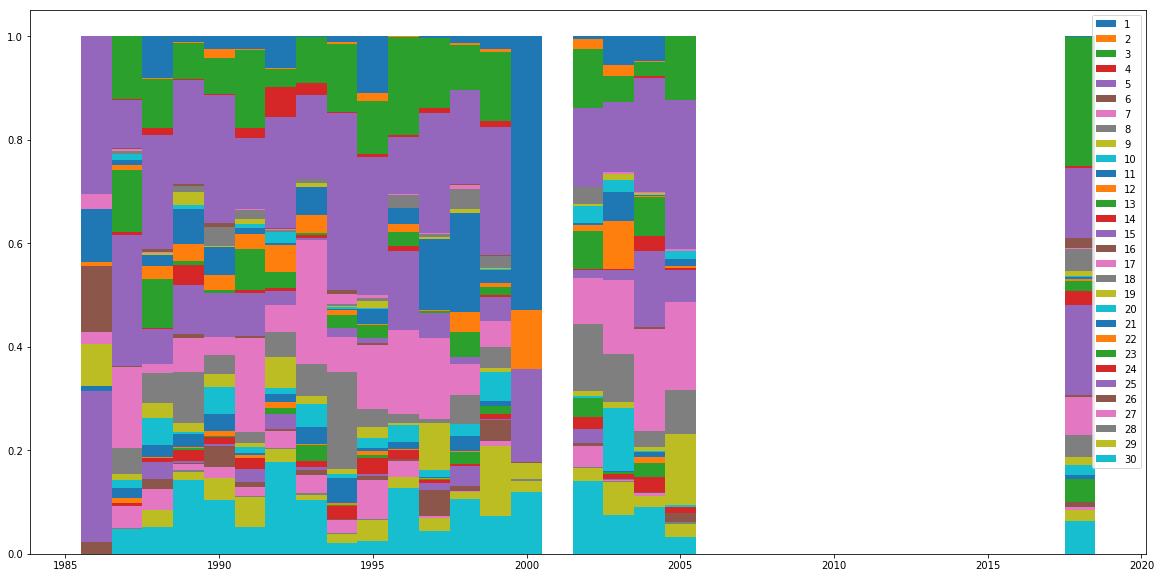

In [67]:
plot_person("Scalia")

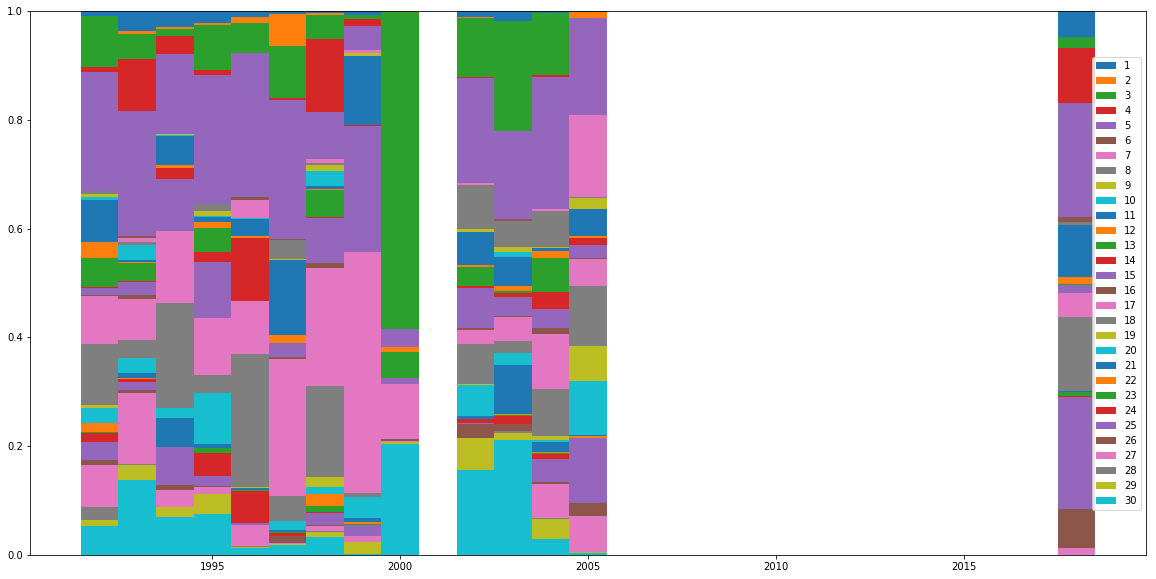

In [70]:
plot_person("Thomas")